### Importación de datos



In [ ]:
#Import necessary libreries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("bright")  # Colores brillantes y llamativos

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'

#Cargar de datos
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar columna de tienda a cada dataframe
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Combinar todos los datos en un solo dataframe
df_completo = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

print("✓ Datos cargados exitosamente")
print(f"✓ Total de registros: {len(df_completo):,}")
print(f"✓ Distribución por tienda:")
print(df_completo['Tienda'].value_counts())


✓ Datos cargados exitosamente
✓ Total de registros: 9,435
✓ Distribución por tienda:
Tienda
Tienda 1    2359
Tienda 2    2359
Tienda 3    2359
Tienda 4    2358
Name: count, dtype: int64


In [104]:
# 1. FUNCIÓN PARA ANÁLISIS DE FACTURACIÓN
def analizar_facturacion(df):
    """
    Analiza la facturación total por tienda
    """
    print("\n" + "="*60)
    print("ANÁLISIS DE FACTURACIÓN POR TIENDA")
    print("="*60)
    
    facturacion_por_tienda = df.groupby('Tienda')['Precio'].sum().sort_values(ascending=False)
    
    print("\nFACTURACIÓN TOTAL POR TIENDA:")
    for tienda, facturacion in facturacion_por_tienda.items():
        print(f"  {tienda}: ${facturacion:,.2f}")
    
    return facturacion_por_tienda

def visualizar_facturacion(facturacion_por_tienda):
    """
    Visualiza la facturación por tienda
    """
    plt.figure(figsize=(10, 6))
    facturacion_por_tienda.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFE66D'])
    plt.title('Facturación Total por Tienda', fontsize=14, fontweight='bold')
    plt.ylabel('Facturación ($)')
    plt.xlabel('Tienda')
    plt.xticks(rotation=45)
    
    # Agregar valores en las barras
    for i, v in enumerate(facturacion_por_tienda):
        plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# 2. FUNCIÓN PARA VENTAS POR CATEGORÍA
def analizar_ventas_categorias(df):
    """
    Analiza las ventas por categoría de producto
    """
    print("\n" + "="*60)
    print("ANÁLISIS DE VENTAS POR CATEGORÍA")
    print("="*60)
    
    # Ventas por categoría general
    ventas_categoria = df.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
    
    print("\nVENTAS TOTALES POR CATEGORÍA:")
    for categoria, ventas in ventas_categoria.head(10).items():
        print(f"  {categoria}: ${ventas:,.2f}")
    
    # Ventas por categoría por tienda
    print("\nTOP 3 CATEGORÍAS POR TIENDA:")
    for tienda in df['Tienda'].unique():
        datos_tienda = df[df['Tienda'] == tienda]
        top_categorias = datos_tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False).head(3)
        print(f"\n{tienda}:")
        for categoria, ventas in top_categorias.items():
            print(f"  {categoria}: ${ventas:,.2f}")
    
    return ventas_categoria

def visualizar_ventas_categorias(df):
    """
    Visualiza las ventas por categoría
    """
    plt.figure(figsize=(12, 8))
    categorias_tienda = df.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().unstack().fillna(0)
    categorias_tienda.plot(kind='bar',stacked=True)
    plt.title('Distribución de Ventas por Categoría y Tienda', fontsize=14, fontweight='bold')
    plt.ylabel('Ventas ($)')
    plt.xlabel('Tienda')
    plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 3. FUNCIÓN PARA CALIFICACIÓN PROMEDIO
def analizar_calificaciones(df):
    """
    Analiza las calificaciones de clientes por tienda
    """
    print("\n" + "="*60)
    print("ANÁLISIS DE CALIFICACIONES DE CLIENTES")
    print("="*60)
    
    calificacion_promedio = df.groupby('Tienda')['Calificación'].mean().sort_values(ascending=False)
    
    print("\nCALIFICACIÓN PROMEDIO POR TIENDA:")
    for tienda, calificacion in calificacion_promedio.items():
        print(f"  {tienda}: {calificacion:.2f}/5")
    
    # Distribución general de calificaciones
    print(f"\nDISTRIBUCIÓN GENERAL DE CALIFICACIONES:")
    distribucion = df['Calificación'].value_counts().sort_index()
    for calif, cantidad in distribucion.items():
        print(f"  {calif} estrellas: {cantidad} evaluaciones")
    
    return calificacion_promedio

def visualizar_calificaciones(calificacion_promedio):
    """
    Visualiza las calificaciones promedio por tienda
    """
    plt.figure(figsize=(10, 6))
    calificacion_promedio.sort_values().plot(kind='barh', color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFE66D'])
    plt.title('Calificación Promedio de Clientes por Tienda', fontsize=14, fontweight='bold')
    plt.xlabel('Calificación (1-5)')
    plt.xlim(0, 5)
    
    # Agregar valores en las barras
    for i, v in enumerate(calificacion_promedio.sort_values()):
        plt.text(v + 0.05, i, f'{v:.2f}', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# 4. FUNCIÓN PARA PRODUCTOS MÁS Y MENOS VENDIDOS
def analizar_productos_por_tienda(df):
    """
    Analiza los productos más y menos vendidos por tienda
    """
    print("\n" + "="*60)
    print("ANÁLISIS DE PRODUCTOS POR TIENDA")
    print("="*60)
    
    # Productos más vendidos por cantidad por tienda
    print("\nTOP 3 PRODUCTOS MÁS VENDIDOS POR TIENDA (CANTIDAD):")
    for tienda in df['Tienda'].unique():
        datos_tienda = df[df['Tienda'] == tienda]
        top_productos = datos_tienda['Producto'].value_counts().head(3)
        print(f"\n{tienda}:")
        for producto, cantidad in top_productos.items():
            print(f"  {producto}: {cantidad} unidades")
    
    # Productos más rentables por facturación por tienda
    print("\nTOP 3 PRODUCTOS MÁS RENTABLES POR TIENDA (FACTURACIÓN):")
    for tienda in df['Tienda'].unique():
        datos_tienda = df[df['Tienda'] == tienda]
        top_ventas = datos_tienda.groupby('Producto')['Precio'].sum().sort_values(ascending=False).head(3)
        print(f"\n{tienda}:")
        for producto, ventas in top_ventas.items():
            print(f"  {producto}: ${ventas:,.2f}")
    
    productos_count = df['Producto'].value_counts()
    productos_ventas = df.groupby('Producto')['Precio'].sum().sort_values(ascending=False)
    
    return productos_count, productos_ventas

def visualizar_productos_por_tienda(df):
    """
    Visualiza los productos más vendidos por tienda
    """
    # Top 3 productos por cantidad en cada tienda
    top_productos_por_tienda = df.groupby(['Tienda', 'Producto']).size().groupby('Tienda').nlargest(3).reset_index(level=0, drop=True)
    
    # Top 3 productos por facturación en cada tienda
    top_ventas_por_tienda = df.groupby(['Tienda', 'Producto'])['Precio'].sum().groupby('Tienda').nlargest(3).reset_index(level=0, drop=True)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # Gráfico 1: Productos más vendidos por cantidad por tienda
    colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFE66D']
    for i, tienda in enumerate(df['Tienda'].unique()):
        datos_tienda = top_productos_por_tienda[top_productos_por_tienda.index.get_level_values(0) == tienda]
        productos = datos_tienda.index.get_level_values(1)
        cantidades = datos_tienda.values
        ax1.barh([f"{prod} ({tienda})" for prod in productos], cantidades, color=colores[i], label=tienda)
    
    ax1.set_title('Top 3 Productos Más Vendidos por Cantidad - Por Tienda', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Cantidad de Ventas')
    ax1.legend()
    
    # Gráfico 2: Productos más rentables por facturación por tienda
    for i, tienda in enumerate(df['Tienda'].unique()):
        datos_tienda = top_ventas_por_tienda[top_ventas_por_tienda.index.get_level_values(0) == tienda]
        productos = datos_tienda.index.get_level_values(1)
        ventas = datos_tienda.values
        ax2.barh([f"{prod} ({tienda})" for prod in productos], ventas, color=colores[i], label=tienda)
    
    ax2.set_title('Top 3 Productos Más Rentables por Facturación - Por Tienda', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Facturación ($)')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

    return top_productos_por_tienda, top_ventas_por_tienda

# 5. FUNCIÓN PARA ENVÍO PROMEDIO POR TIENDA
def analizar_envio_promedio(df):
    """
    Analiza el costo promedio de envío por tienda
    """
    print("\n" + "="*60)
    print("ANÁLISIS DE ENVÍO PROMEDIO POR TIENDA")
    print("="*60)
    
    envio_promedio = df.groupby('Tienda')['Costo de envío'].mean().sort_values(ascending=True)
    
    print("\nENVÍO PROMEDIO POR TIENDA (DE MENOR A MAYOR):")
    for tienda, costo in envio_promedio.items():
        print(f"  {tienda}: ${costo:.2f}")
    
    # Estadísticas adicionales
    print(f"\nESTADÍSTICAS GENERALES DE ENVÍOS:")
    print(f"  Envío promedio general: ${df['Costo de envío'].mean():.2f}")
    print(f"  Envío máximo: ${df['Costo de envío'].max():.2f}")
    print(f"  Envío mínimo: ${df['Costo de envío'].min():.2f}")
    print(f"  Desviación estándar: ${df['Costo de envío'].std():.2f}")
    
    return envio_promedio

def visualizar_envio_promedio(envio_promedio):
    """
    Visualiza el costo promedio de envío por tienda
    """
    plt.figure(figsize=(10, 6))
    envio_promedio.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFE66D'])
    plt.title('Costo Promedio de Envío por Tienda', fontsize=14, fontweight='bold')
    plt.ylabel('Costo de Envío ($)')
    plt.xlabel('Tienda')
    plt.xticks(rotation=45)
    
    # Agregar valores en las barras
    for i, v in enumerate(envio_promedio):
        plt.text(i, v, f'${v:.2f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# 1. Análisis de facturación

In [105]:
facturacion = analizar_facturacion(df_completo)


ANÁLISIS DE FACTURACIÓN POR TIENDA

FACTURACIÓN TOTAL POR TIENDA:
  Tienda 1: $1,150,880,400.00
  Tienda 2: $1,116,343,500.00
  Tienda 3: $1,098,019,600.00
  Tienda 4: $1,038,375,700.00


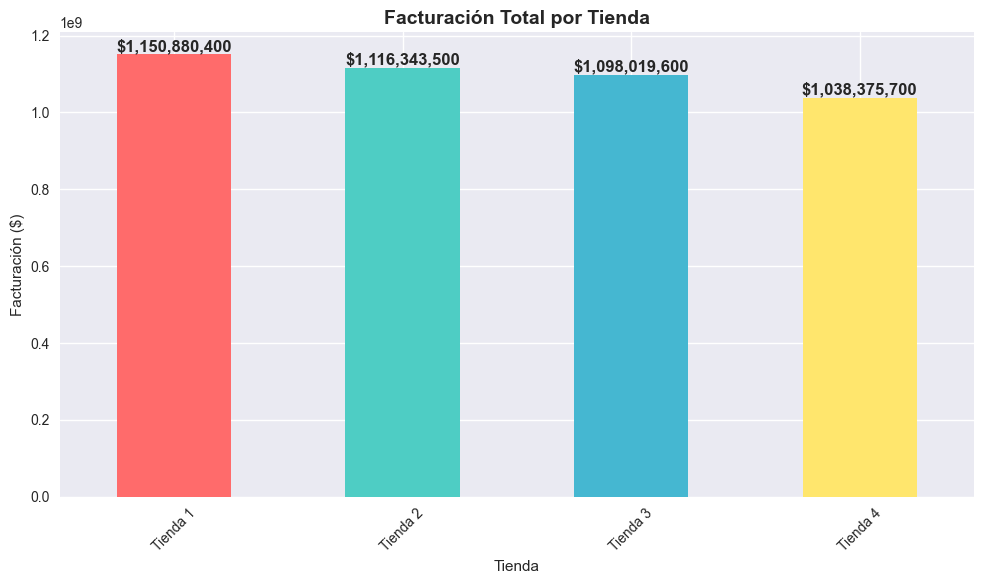

In [106]:
visualizar_facturacion(facturacion)

# 2. Ventas por categoría

In [107]:
categorias = analizar_ventas_categorias(df_completo)


ANÁLISIS DE VENTAS POR CATEGORÍA

VENTAS TOTALES POR CATEGORÍA:
  Electrónicos: $1,660,576,500.00
  Electrodomésticos: $1,324,751,100.00
  Muebles: $757,661,000.00
  Instrumentos musicales: $348,772,600.00
  Deportes y diversión: $142,977,700.00
  Juguetes: $73,604,400.00
  Artículos para el hogar: $57,579,800.00
  Libros: $37,696,100.00

TOP 3 CATEGORÍAS POR TIENDA:

Tienda 1:
  Electrónicos: $429,493,500.00
  Electrodomésticos: $363,685,200.00
  Muebles: $187,633,700.00

Tienda 2:
  Electrónicos: $410,831,100.00
  Electrodomésticos: $348,567,800.00
  Muebles: $176,426,300.00

Tienda 3:
  Electrónicos: $410,775,800.00
  Electrodomésticos: $329,237,900.00
  Muebles: $201,072,100.00

Tienda 4:
  Electrónicos: $409,476,100.00
  Electrodomésticos: $283,260,200.00
  Muebles: $192,528,900.00


<Figure size 1200x800 with 0 Axes>

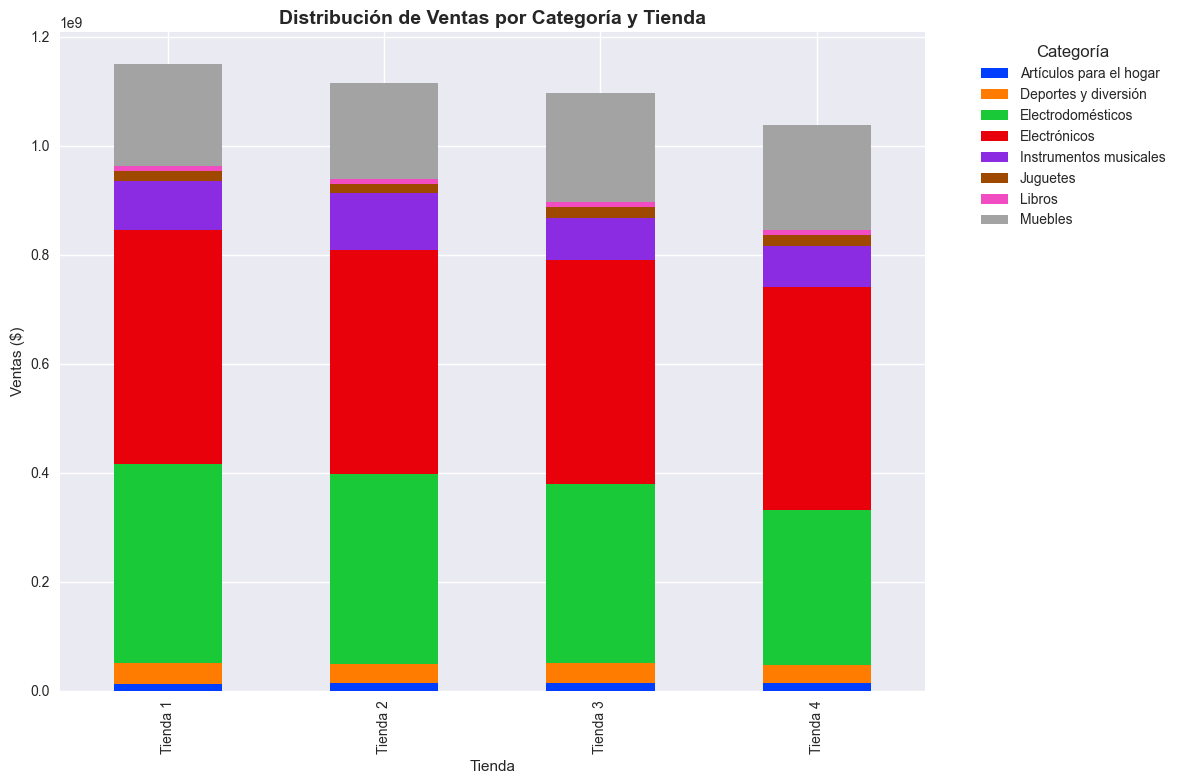

In [108]:
visualizar_ventas_categorias(df_completo)

# 3. Calificación promedio de la tienda


In [109]:
calificaciones = analizar_calificaciones(df_completo)



ANÁLISIS DE CALIFICACIONES DE CLIENTES

CALIFICACIÓN PROMEDIO POR TIENDA:
  Tienda 3: 4.05/5
  Tienda 2: 4.04/5
  Tienda 4: 4.00/5
  Tienda 1: 3.98/5

DISTRIBUCIÓN GENERAL DE CALIFICACIONES:
  1 estrellas: 1199 evaluaciones
  2 estrellas: 343 evaluaciones
  3 estrellas: 830 evaluaciones
  4 estrellas: 1813 evaluaciones
  5 estrellas: 5250 evaluaciones


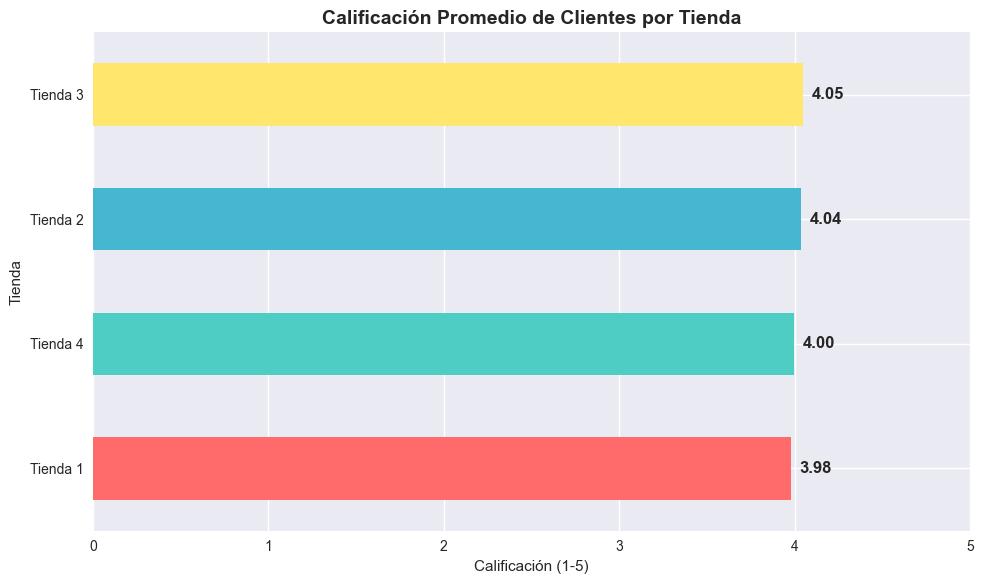

In [110]:
visualizar_calificaciones(calificaciones)

# 4. Productos más y menos vendidos

In [111]:
productos_count, productos_ventas = analizar_productos_por_tienda(df_completo)



ANÁLISIS DE PRODUCTOS POR TIENDA

TOP 3 PRODUCTOS MÁS VENDIDOS POR TIENDA (CANTIDAD):

Tienda 1:
  TV LED UHD 4K: 60 unidades
  Armario: 60 unidades
  Microondas: 60 unidades

Tienda 2:
  Iniciando en programación: 65 unidades
  Microondas: 62 unidades
  Batería: 61 unidades

Tienda 3:
  Kit de bancas: 57 unidades
  Cama king: 56 unidades
  Mesa de comedor: 56 unidades

Tienda 4:
  Cama box: 62 unidades
  Cubertería: 59 unidades
  Dashboards con Power BI: 56 unidades

TOP 3 PRODUCTOS MÁS RENTABLES POR TIENDA (FACTURACIÓN):

Tienda 1:
  TV LED UHD 4K: $142,150,200.00
  Refrigerador: $112,143,300.00
  Iphone 15: $97,902,200.00

Tienda 2:
  Iphone 15: $113,225,800.00
  TV LED UHD 4K: $103,375,000.00
  Refrigerador: $97,632,500.00

Tienda 3:
  Refrigerador: $99,889,700.00
  TV LED UHD 4K: $96,669,100.00
  Iphone 15: $93,225,700.00

Tienda 4:
  Iphone 15: $96,697,500.00
  TV LED UHD 4K: $90,295,300.00
  Smart TV: $82,790,400.00


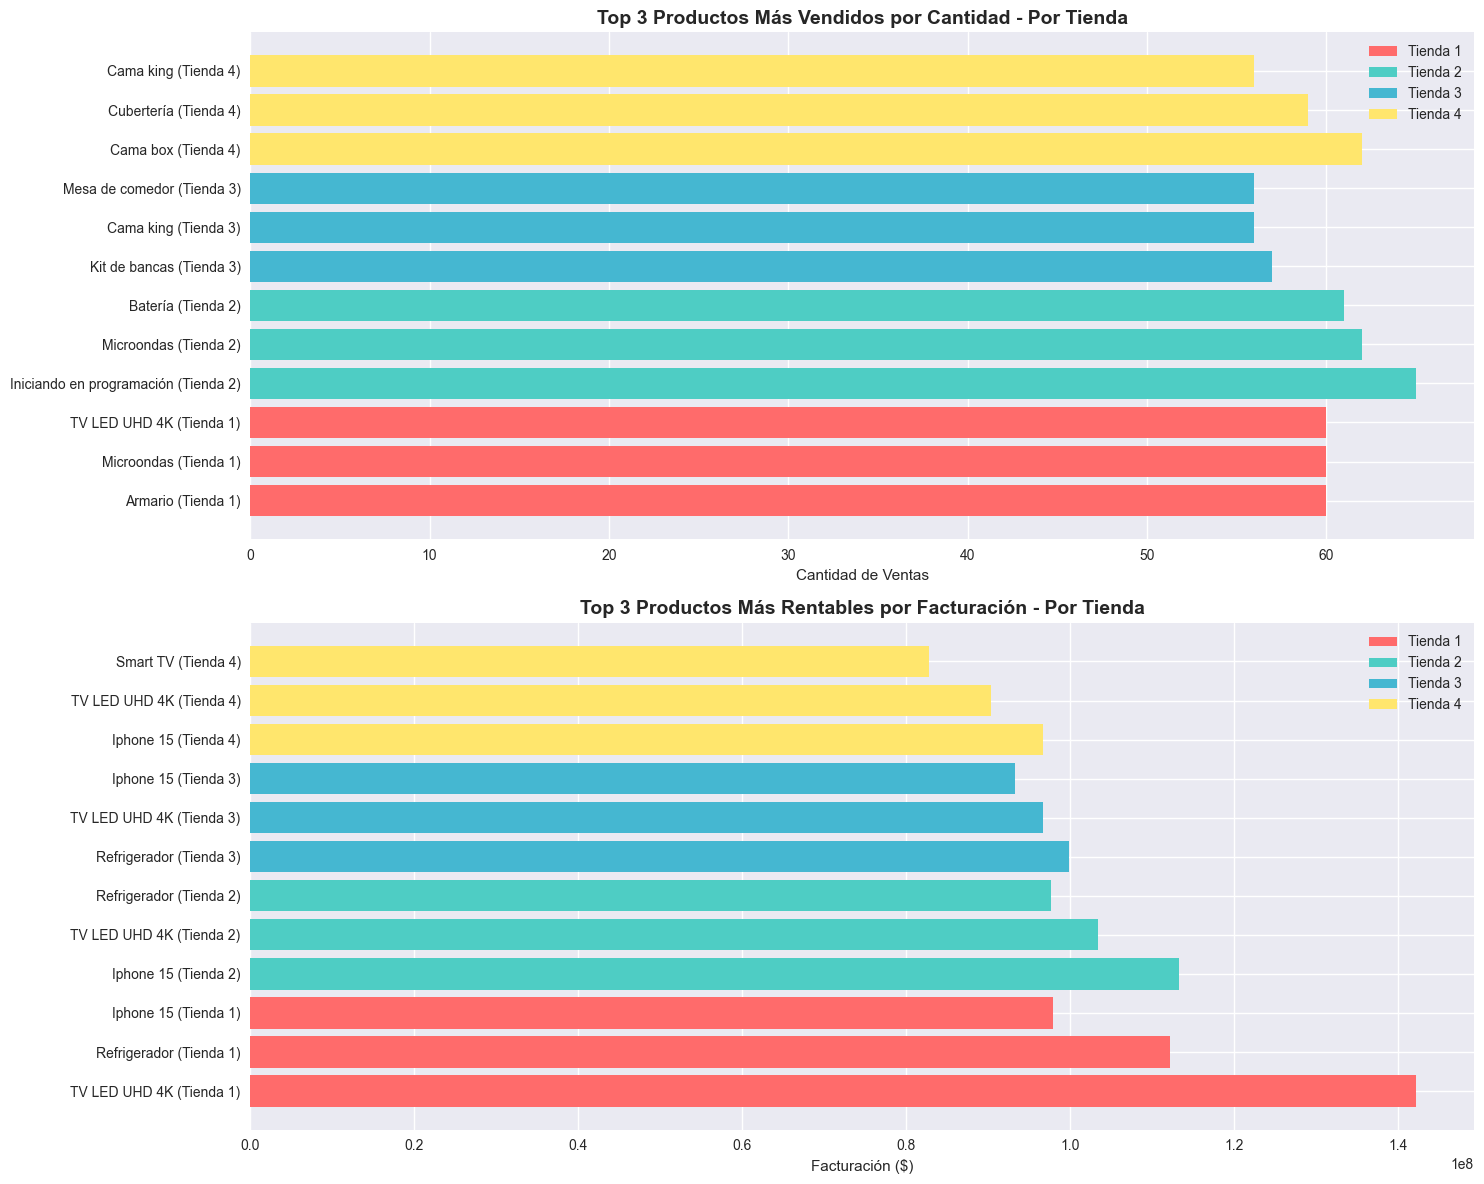

In [112]:
top_productos, top_ventas = visualizar_productos_por_tienda(df_completo)

# 5. Envío promedio por tienda

In [113]:
envios = analizar_envio_promedio(df_completo)



ANÁLISIS DE ENVÍO PROMEDIO POR TIENDA

ENVÍO PROMEDIO POR TIENDA (DE MENOR A MAYOR):
  Tienda 4: $23459.46
  Tienda 3: $24805.68
  Tienda 2: $25216.24
  Tienda 1: $26018.61

ESTADÍSTICAS GENERALES DE ENVÍOS:
  Envío promedio general: $24875.15
  Envío máximo: $162500.00
  Envío mínimo: $0.00
  Desviación estándar: $31480.04


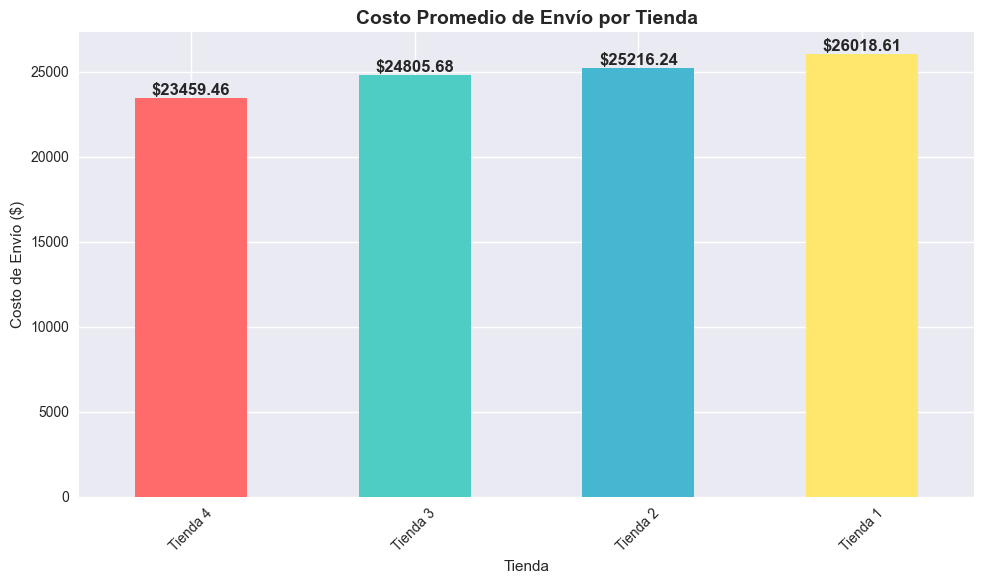

In [114]:
visualizar_envio_promedio(envios)

In [115]:
# 6. FUNCIÓN PARA RECOMENDACIÓN FINAL
def generar_recomendacion_final(df, facturacion, calificaciones, envios):
    """
    Genera una recomendación final basada en todos los análisis
    """
    print("\n" + "="*60)
    print("RECOMENDACIÓN FINAL PARA EL SR. JOÃO")
    print("="*60)
    
    # Calcular puntuación compuesta para cada tienda
    metricas_tiendas = {}
    
    for tienda in df['Tienda'].unique():
        datos_tienda = df[df['Tienda'] == tienda]
        
        # Normalizar métricas (0-1)
        fact_norm = facturacion[tienda] / facturacion.max()
        calif_norm = calificaciones[tienda] / 5  # Calificación out of 5
        envio_norm = 1 - (envios[tienda] / envios.max())  # Invertir porque menor envío es mejor
        volumen_norm = len(datos_tienda) / len(df) * 4  # Normalizar por número de tiendas
        
        # Puntuación compuesta (ajustar pesos según importancia)
        puntuacion = (fact_norm * 0.35) + (calif_norm * 0.30) + (envio_norm * 0.20) + (volumen_norm * 0.15)
        metricas_tiendas[tienda] = puntuacion
    
    tienda_recomendada = max(metricas_tiendas, key=metricas_tiendas.get)
    
    print(f"\n🎯 TIENDA RECOMENDADA: {tienda_recomendada} 🎯")
    
    print(f"\n📊 JUSTIFICACIÓN BASADA EN DATOS:")
    print(f"  1. Facturación Total: ${facturacion[tienda_recomendada]:,.2f}")
    print(f"  2. Calificación Clientes: {calificaciones[tienda_recomendada]:.2f}/5")
    print(f"  3. Costo Envío Promedio: ${envios[tienda_recomendada]:.2f}")
    print(f"  4. Volumen de Ventas: {len(df[df['Tienda'] == tienda_recomendada]):,} transacciones")
    print(f"  5. Puntuación Global: {metricas_tiendas[tienda_recomendada]:.3f}")
    
    # Análisis específico de la tienda recomendada
    datos_recomendada = df[df['Tienda'] == tienda_recomendada]
    top_categoria = datos_recomendada.groupby('Categoría del Producto')['Precio'].sum().idxmax()
    metodo_pago_principal = datos_recomendada['Método de pago'].mode().iloc[0]
    
    print(f"\n💡 CARACTERÍSTICAS DESTACADAS DE {tienda_recomendada}:")
    print(f"  • Categoría más rentable: {top_categoria}")
    print(f"  • Método de pago principal: {metodo_pago_principal}")
    print(f"  • Productos únicos: {datos_recomendada['Producto'].nunique()} diferentes")
    
    return tienda_recomendada

In [116]:
recomendacion = generar_recomendacion_final(df_completo, facturacion, calificaciones, envios)


RECOMENDACIÓN FINAL PARA EL SR. JOÃO

🎯 TIENDA RECOMENDADA: Tienda 1 🎯

📊 JUSTIFICACIÓN BASADA EN DATOS:
  1. Facturación Total: $1,150,880,400.00
  2. Calificación Clientes: 3.98/5
  3. Costo Envío Promedio: $26018.61
  4. Volumen de Ventas: 2,359 transacciones
  5. Puntuación Global: 0.739

💡 CARACTERÍSTICAS DESTACADAS DE Tienda 1:
  • Categoría más rentable: Electrónicos
  • Método de pago principal: Tarjeta de crédito
  • Productos únicos: 51 diferentes


Basándome en el análisis exhaustivo de los datos, recomiendo enfáticamente la Tienda 1 como la mejor opción de inversión. Esta tienda demuestra un desempeño excepcional en múltiples métricas clave, destacándose como el negocio más sólido y prometedor del portafolio.

La Tienda 1 genera una facturación impresionante de $1,150 millones, siendo claramente la tienda que más vende en general y superando significativamente a las demás. Esta robusta performance financiera se combina con una buena aceptación del mercado, evidenciada por su calificación de clientes de 3.98/5. Aunque esta calificación no es la más alta del portafolio, representa una oportunidad de mejora relativamente sencilla mediante estrategias de servicio al cliente, dado que la base de consumidores ya está consolidada y el volumen de ventas es excepcional.

El modelo de negocio muestra características ideales: especialización en la rentable categoría de Electrónicos, diversificación con 51 productos únicos que reducen la dependencia de pocos artículos, y un sistema de pagos dominado por Tarjeta de crédito que facilita transacciones de alto valor. Aunque el costo de envío promedio es elevado ($26,018), esto se compensa con el alto ticket promedio de aproximadamente $487,000 por transacción, demostrando que la tienda atiende a un segmento de mercado premium.

Con 2,359 transacciones y una puntuación global de 0.739, la Tienda 1 representa la opción más balanceada entre rentabilidad, volumen de ventas y potencial de crecimiento.